In [1]:
from scipy.stats import norm
import numpy as np
import sympy
import scipy
import torch
from numpy import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
emc = float( sympy.S.EulerGamma.n(10) )
from tteVAMP.problem import Problem
from tteVAMP.simulations import sim_model
from tteVAMP.vamp import infere
from tteVAMP.utils import plot_metrics

EM updates are stable in low-dimensional setting

Weibull
gam1 =  0.01
tau1 =  0.1
alpha =  18.644163165242592
s.shape =  (10,)
**** iteration =  0  **** 

->DENOISING
x1_hat[2] =  [0.]
B / (A+B) =  [0.39880656]
gam1 / (gam1 + 1/sigma) =  0.009900990099009901
alpha1 part I =  [0.00394858]
alpha2 part II =  [0.]
alpha1 =  0.003948579767497003
true gam2 =  1.3445472989277858
gam2 =  2.5225561565998147
corr(z1_hat, X*beta_true) =  0.749249496487252
l2 error for z1_hat =  0.707278164175877


/Users/alexanders/vampW/tteVAMP/denoisers.py:100: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  out[i] = scipy.optimize.fsolve(den_z_non_lin_eq_Weibull, x0 = p1[i], args=(tau1, p1[i], y[i], alpha, mu) )
/Users/alexanders/vampW/tteVAMP/denoisers.py:93: RuntimeWarning: overflow encountered in exp
  res = tau1 * (z-p1) + alpha - alpha * np.power(y, alpha) * np.exp(- alpha * (mu + z) - emc)


v1 =  0.0019063304962284506
true tau2 =  288.775496751036
tau2 = 52.35680127231004
->LMMSE
corr(x2_hat, beta_true) =  [[0.9935882]]
l2 error for x2_hat =  0.24597176424555478
alpha2 =  0.08343825314320316
true gam1 =  45.05890374975409
gam1 =  27.71005372642841
corr(z2_hat, beta_true) =  [[0.98919321]]
l2 error for z2_hat =  0.31469225484390945
true tau1 =  3506.397158247353
tau1 =  4517.487092113762


**** iteration =  1  **** 

->DENOISING
x1_hat[2] =  [-1.67843356]
corr(x1_hat, beta_true) =  0.9936994867887851
l2 error for x1_hat =  0.21468534183391938
B / (A+B) =  [0.11336789]
gam1 / (gam1 + 1/sigma) =  0.9651689958671351
alpha1 part I =  [0.10941917]
alpha2 part II =  [0.00529638]
alpha1 =  0.6119681689833596
true gam2 =  19.042176950450976
gam2 =  17.570166930247428
corr(z1_hat, X*beta_true) =  0.9884171230158914
l2 error for z1_hat =  0.3181539054125836
v1 =  0.9926695690740773
true tau2 =  302.04785817572457
tau2 = 33.35966782821364
->LMMSE
corr(x2_hat, beta_true) =  [[0.948453

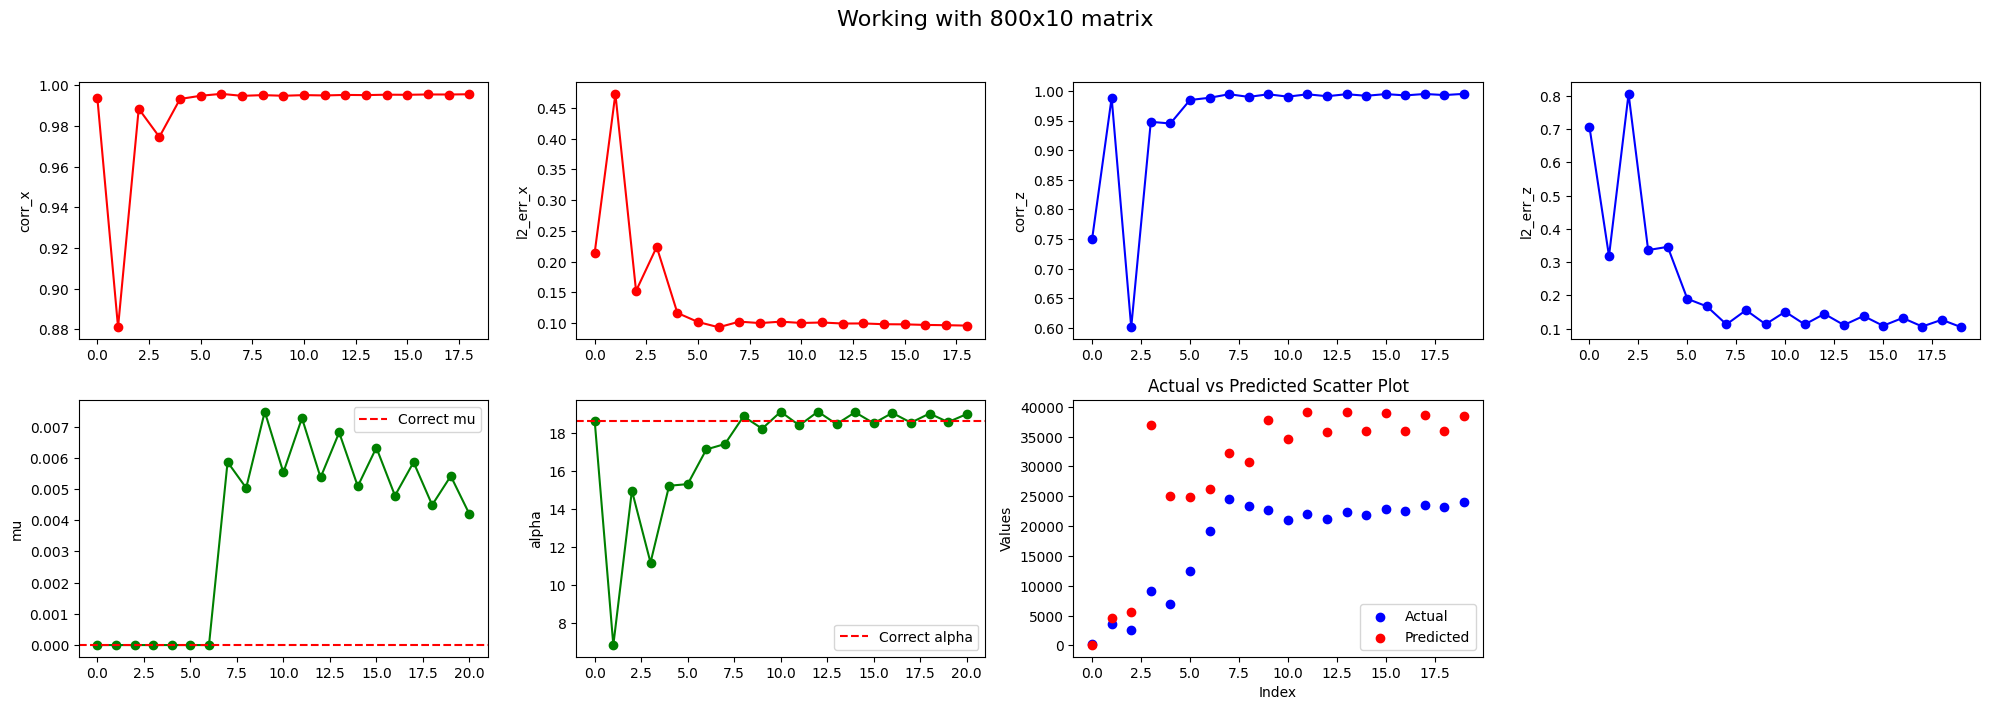

In [2]:
np.random.seed(42)
n=800
m=10
p=0.4
la=0.4
# This is where the sigma is defined. Note that the scope of this definition extends to gvamp
sigma=1
omega=1
h2=0.5
gam1 = 1e-2
tau1 = 1e-1
mu=np.full((n,1), 0) 
maxiter = 20
problem_instance = Problem(n=n, m=m, la=la, sigmas = [sigma], omegas=[omega], model='Weibull', mu=mu)
X,beta,y,alpha = sim_model(problem_instance,h2,p )

print("gam1 = ", gam1)
print("tau1 = ", tau1)
print("alpha = ", alpha)

# we start with an initialization that compleately complies with the assumptions
r1 = np.zeros((m,1))
#r1 = beta + random.normal(loc=0.0, scale=np.sqrt(1.0/gam1), size=[m,1])
p1 = np.zeros((n,1)) 
#p1 = X @ beta + random.normal(loc=0.0, scale=np.sqrt(1.0/tau1), size=[n,1])
problem_instance.prior_instance.distribution_parameters['alpha']=alpha

est, gam1, corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, a, ps, dl_dmus, z1_hats =  infere(X, y, gam1, r1, tau1, p1, problem_instance, maxiter, beta, True, True)
plot_metrics(corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, dl_dmus, a, ps, mu[0][0], alpha, n, m)

Once dimensionality increases, the EM updates for mu lead us in the wrong direction <br>
Correlation between true signal z and the predicted signal z1_hat after denoising (den_z) drops and the l2 error increases

Weibull
gam1 =  177.43139449749688
tau1 =  0.1
alpha =  5.572760024264562
s.shape =  (200,)
**** iteration =  0  **** 

->DENOISING
x1_hat[2] =  [0.]
B / (A+B) =  [0.0475359]
gam1 / (gam1 + 1/sigma) =  0.9943956050849895
alpha1 part I =  [0.04726949]
alpha2 part II =  [0.]
alpha1 =  0.047269490109049454
true gam2 =  2.237374591527024
gam2 =  3576.1820692434358
corr(z1_hat, X*beta_true) =  0.8202903041401612
l2 error for z1_hat =  0.5869312697546399
v1 =  0.0064970858722665815
true tau2 =  21.479069887030434
tau2 = 15.291515822017892
->LMMSE
corr(x2_hat, beta_true) =  [[0.17100731]]
l2 error for x2_hat =  0.9964787782188252
alpha2 =  0.9961923608467419
true gam1 =  5.3445845775481455
gam1 =  13.668856940899335
corr(z2_hat, beta_true) =  [[0.82536969]]
l2 error for z2_hat =  0.8372112541263457
true tau1 =  19.02538581615905
tau1 =  16048.7473350584


**** iteration =  1  **** 

->DENOISING
x1_hat[2] =  [4.17930829]
corr(x1_hat, beta_true) =  0.17100730983417692
l2 error for x1_hat =  5.2

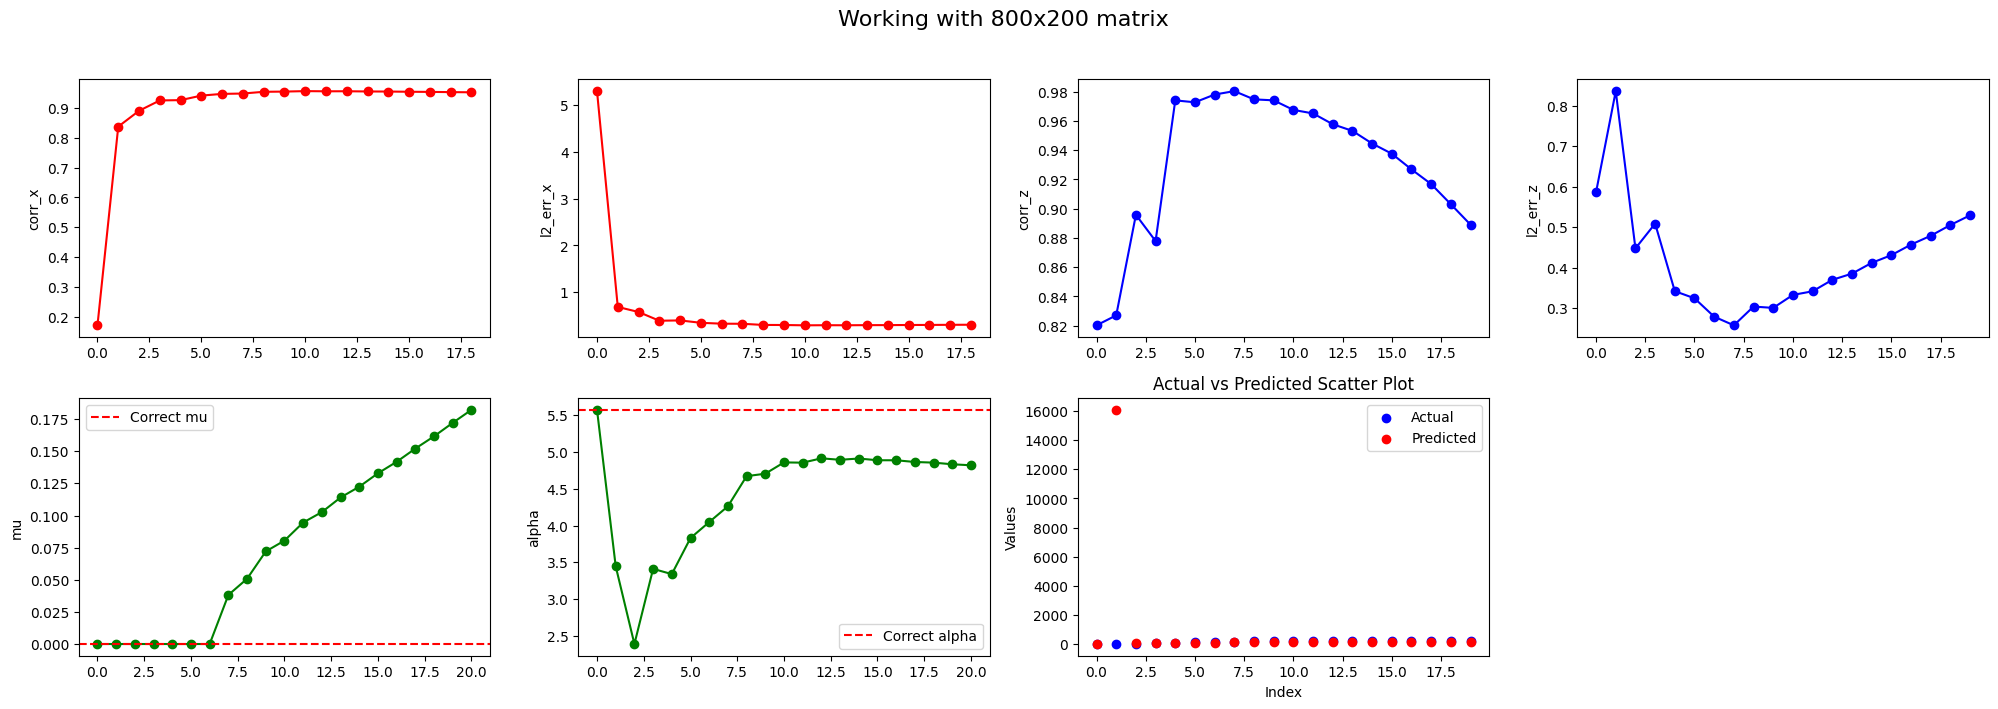

In [3]:
np.random.seed(42)
n=800
m=200
r1 = np.zeros((m,1))
p1 = np.zeros((n,1))
mu=np.full((n,1), 0) 

problem_instance = Problem(n=n, m=m, la=la, sigmas = [sigma], omegas=[omega], model='Weibull', mu=mu)
X,beta,y,alpha = sim_model(problem_instance,h2,p )

print("gam1 = ", gam1)
print("tau1 = ", tau1)
print("alpha = ", alpha)

# we start with an initialization that compleately complies with the assumptions
r1 = np.zeros((m,1))
#r1 = beta + random.normal(loc=0.0, scale=np.sqrt(1.0/gam1), size=[m,1])
p1 = np.zeros((n,1)) 
#p1 = X @ beta + random.normal(loc=0.0, scale=np.sqrt(1.0/tau1), size=[n,1])
problem_instance.prior_instance.distribution_parameters['alpha']=alpha

est, gam1, corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, a, ps, dl_dmus, z1_hats =  infere(X, y, gam1, r1, tau1, p1, problem_instance, maxiter, beta, True, True)
plot_metrics(corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, dl_dmus, a, ps, mu[0][0], alpha, n, m)

Algorithm is stable if we fix mu to be empirical average of Log(Y)

Weibull
gam1 =  6.832321945119836
tau1 =  0.1
alpha =  2.9361235628007685
s.shape =  (800,)
**** iteration =  0  **** 

->DENOISING
x1_hat[2] =  [0.]
B / (A+B) =  [0.1923838]
gam1 / (gam1 + 1/sigma) =  0.8723239408432285
alpha1 part I =  [0.16782099]
alpha2 part II =  [0.]
alpha1 =  0.1678209941751314
true gam2 =  2.3722202522924425
gam2 =  33.87964009933029
corr(z1_hat, X*beta_true) =  0.5290047533799667
l2 error for z1_hat =  0.9605651047308081
v1 =  0.050136652118083234
true tau2 =  6.2399873309118306
tau2 = 1.8945488136000233
->LMMSE
corr(x2_hat, beta_true) =  [[0.51276119]]
l2 error for x2_hat =  0.9838370895090972
alpha2 =  0.9733751806234335
true gam1 =  1.9737519457061403
gam1 =  0.9267128607183136
corr(z2_hat, beta_true) =  [[-0.13045969]]
l2 error for z2_hat =  1.0248608479036438
true tau1 =  5.39872920888024
tau1 =  69.2626968677543


**** iteration =  1  **** 

->DENOISING
x1_hat[2] =  [-0.11978683]
corr(x1_hat, beta_true) =  0.5522706447810106
l2 error for x1_hat =  0.8836

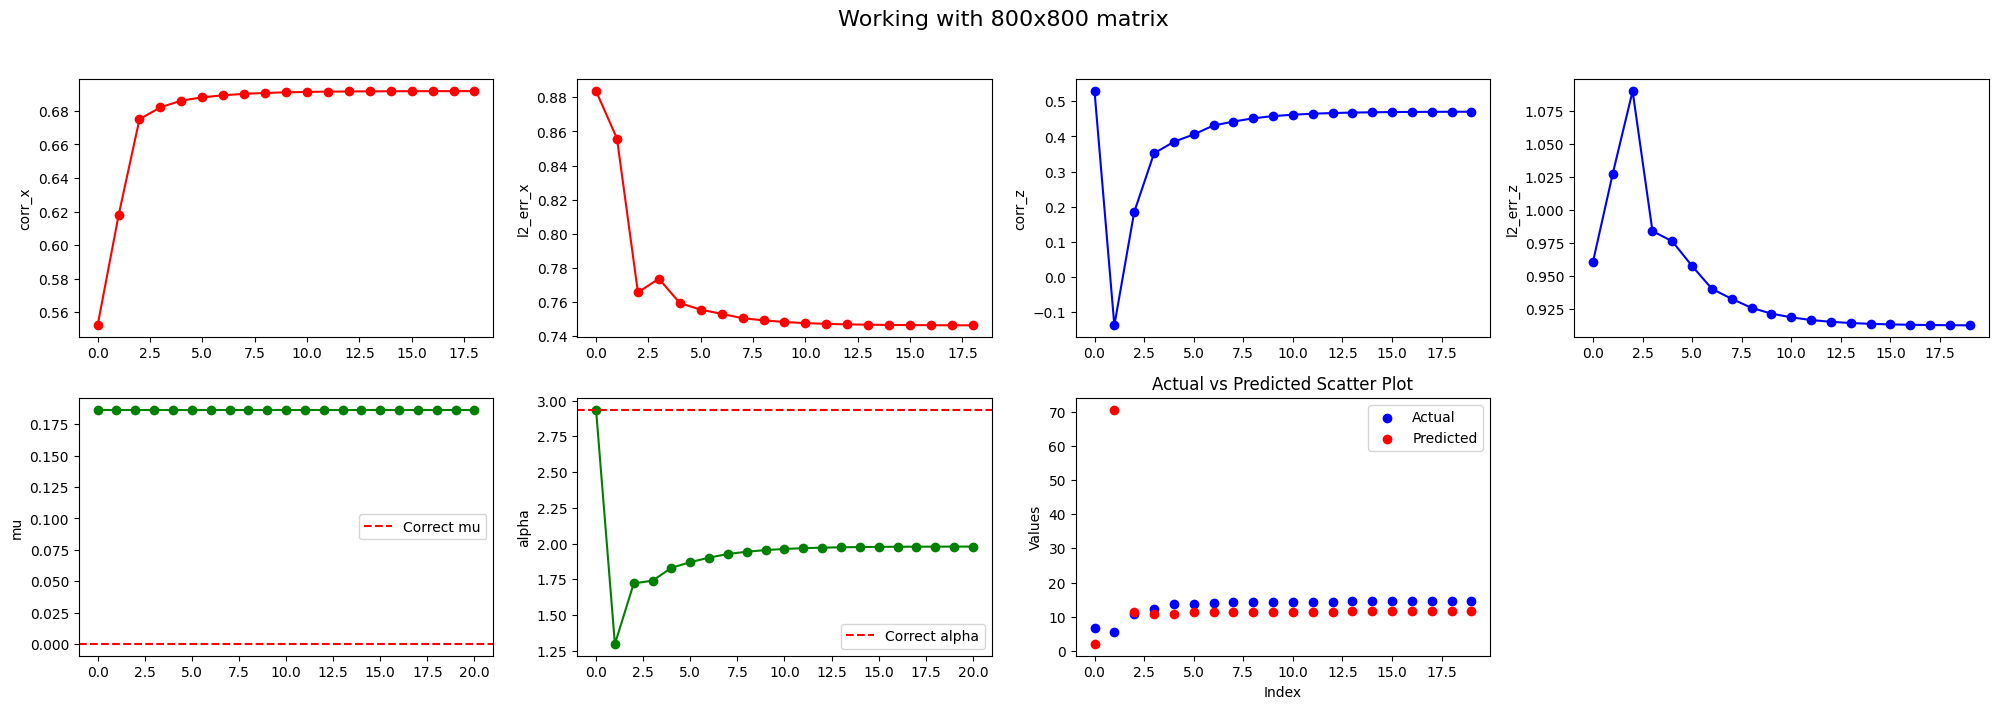

In [4]:
np.random.seed(42)
n=800
m=800
mu=np.full((n,1), 0) 
r1 = np.zeros((m,1))
p1 = np.zeros((n,1))

problem_instance = Problem(n=n, m=m, la=la, sigmas = [sigma], omegas=[omega], model='Weibull', mu=mu)
X,beta,y,alpha = sim_model(problem_instance,h2,p )
problem_instance.prior_instance.distribution_parameters['mu'] = np.mean(np.log(y)).reshape(-1, 1)

print("gam1 = ", gam1)
print("tau1 = ", tau1)
print("alpha = ", alpha)

# we start with an initialization that compleately complies with the assumptions
r1 = np.zeros((m,1))
#r1 = beta + random.normal(loc=0.0, scale=np.sqrt(1.0/gam1), size=[m,1])
p1 = np.zeros((n,1)) 
#p1 = X @ beta + random.normal(loc=0.0, scale=np.sqrt(1.0/tau1), size=[n,1])
problem_instance.prior_instance.distribution_parameters['alpha']=alpha

est, gam1, corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, a, ps, dl_dmus, z1_hats =  infere(X, y, gam1, r1, tau1, p1, problem_instance, maxiter, beta, False, True)
plot_metrics(corrs_x, l2_errs_x, corrs_z, l2_errs_z, mus, alphas, dl_dmus, a, ps, mu[0][0], alpha, n, m)